# MMN 11 -  Computability and Complexity

Roman Smirnov - 312914443 - 26/03/2018





## Question 1
We define a Turing Machine (TM) which decides the palindrome language PAL(:= $\{w \in \{0, 1\}^* | w = w^R\})$. 

### Overview
The TM reads the leftmost symbol of the tape, loops forward to the end of the input, reads the rightmost symbol,
compares and rejects if leftmost and rightmost symbols are not equivalent, rewinds tape, if not symbols are left the TM accepts the word.  

### Decidability
Our TM _decides_ PAL because it rejects all words such that a symbol at the ith position from the start of the word is not equal to the symbol at the ith position from the end of the word (i.e all non-palindromes),
and accepts all other words - which are in PAL by way of its definition.

### Definition

1. Finite set of states $Q = \{ q_0, q_1, q_2, q_3, q_4, q_5, q_accept, q_reject \} $
2. Input alphabet $ \Sigma = \{0,1\} $
3. Tape alphabet $\Gamma = \{0,1,\_ \}$
4. Transition function $\delta : Q \times \Gamma  \rightarrow Q \times \Gamma \times \{ L, R \} $ (as defined by the diagram).
5. Start state $q_0$
6. Accept state $ q_{accept} $ (the input is a palindrome).
7. Reject state $q_{reject} $ (the input is not a palindrome).

### Diagram

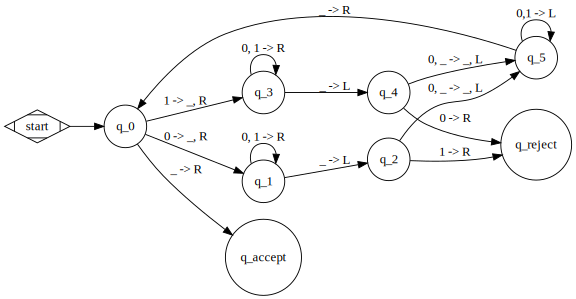

In [68]:
from graphviz import Digraph

f = Digraph('palindrome deciding turing machine')
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='Mdiamond')
f.node('start')

f.attr('node', shape='circle')
f.edge('start', 'q_0')

# initial state - read left symbol
f.edge('q_0', 'q_1', label='0 -> _, R')
f.edge('q_0', 'q_3', label='1 -> _, R')
f.edge('q_0', 'q_accept', label='_ -> R')

# loop forward - case 0
f.edge('q_1','q_1', label='0, 1 -> R')
f.edge('q_1','q_2', label='_ -> L')
# check right symbol - case 0
f.edge('q_2','q_5', label='0, _ -> _, L')
f.edge('q_2','q_reject', label='1 -> R')

# loop forward - case 1
f.edge('q_3','q_3', label='0, 1 -> R')
f.edge('q_3','q_4', label='_ -> L')

# check right symbol - case 1
f.edge('q_4','q_5', label='0, _ -> _, L')
f.edge('q_4','q_reject', label='0 -> R')


# rewind to tape start
f.edge('q_5','q_5', label='0,1 -> L')
f.edge('q_5','q_0', label='_ -> R')


f



## Question 2.A

We're given $|w| = n$, and $ w \# w \in B $ (:= as in example 3.9, p.173).

The TM $M_1$ (:= as in figure 3.10, p.174) reads the symbol '#' when performing the following:
1. ($q_2$\ $q_3$) winding forward to end of input.
2. ($q_6$) re-winding to start of input.
3. ($q_1$) all symbols except middle already checked.

Since $ w\#w \in B $, $w \# w$ is not rejected $M_1$ checks every pair of symbols before entering q_accept. 
Thus, # is read 2 times per symbol pair check (2n times), and is read once right before reaching q_accept (1 times).

We conclude # is read for a 2n+1 times.





## Question 2.B

We can achieve a reduction to n+1 reads of symbol # by utilizing the symbol itself to mark the first unchecked symbol of the duplicate word.
Consequentially, the # symbol will still be read once when forward-winding, but the read during re-winding will be eliminated (thus 2n-1-n = n-1). 

1. We'll modify the forward-winding step (q_2/q_3) by adding symbol x to the self-loop cases, we'll also write an x upon reaching #. 
2. We'll modify the check step (q_4/q_5) by writing a # after doing the comparison.
3. We''ll modify the first rewind step (q_6) by looping back until the first 0/1 symbol.
4. We''ll modify the second rewind step (q_7) by looping back until the first x symbol.





## Question 3
Given an extened TM $M_e$ with a transition of the type $ \delta(q, a) = (r, b, R_k)$ or $ \delta(q, a) = (r, b, L_k)$.
We can simulate $M_e$ with a canonical TM ($M_c$) by adding symbols to the tape alphabet $\Gamma$ or adding states to the set of states $Q$.
By way of the above, $M_e$ and $M_c$ are computability equivalent.

We'll elect to demonstrate the state based method:
For each state in $M_e$ with an extended transition (k>1) to it, we'll create k transition states in $M_c$.
We'll arrange the transition states sequentially, such that each moves the tape-head exactly once (for total of k), the last state transitions to the target state.

### Diagram

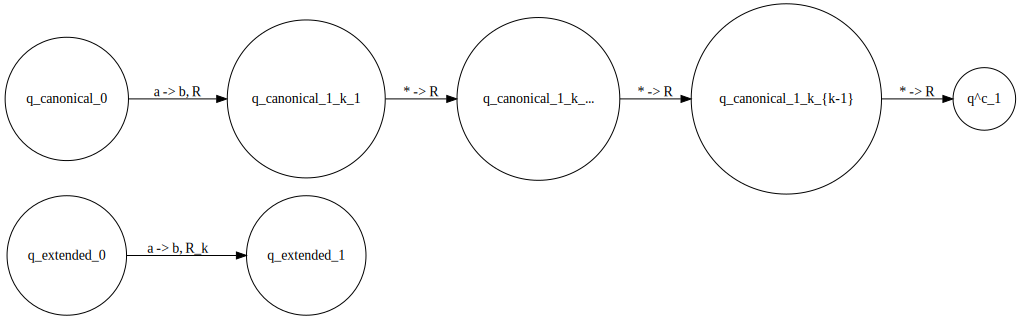

In [69]:
from graphviz import Digraph

dot = Digraph('transition exteneded turing machine simulator')
dot.attr(rankdir='LR')

dot.attr('node', shape='circle')

# Extended TM transition
dot.edge('q_extended_0', 'q_extended_1', label='a -> b, R_k')

# Canonical TM simulation
dot.edge('q_canonical_0', 'q_canonical_1_k_1', label='a -> b, R')
dot.edge('q_canonical_1_k_1', 'q_canonical_1_k_...', label='* -> R')
dot.edge('q_canonical_1_k_...', 'q_canonical_1_k_{k-1}', label='* -> R')
dot.edge('q_canonical_1_k_{k-1}', 'q^c_1', label='* -> R')

dot



## Question 4.A

### Overview
We accept if |w| is found to be composite prime, we reject |w| is found to be prime.
The idea is to use alternate between 2 TMs, such that one recognizes the language and the other recognizes its complement. 
Thus, we form a NDTM (Non-Deterministic TM) which answer the definition of a decider. 


### Steps
1. accept if |w| <=1 
2. choose an 1<i<n and mark each ith position until end of input
3. accept if the last input position is marked 
4. reject if all except last symbol are checked
5. back to 2

The NDTM advantage is we don't have to keep track of i.




## Question 4.B
If we replace q_accept with q_reject we'll reject all composites and accept all primes.
The NDTM will become a word length primality test - i.e decide the language of prime length words. 

This correct because the proposed NDTM is composed of a prime recognizer and a composite recognizer (which are complements).





## Questions 5
We're required to define a two-tape deterministic TM which does a DFS on the search tree defined by a non-deterministic TM decider. 

### Notes and Assumptions
* We're given the NDTM to be simulated is a decider, which means every branch terminates. 
* If we make a choice, we won't ever need to go back because it will terminate. So no need to keep the original input. 
* We need some way to know which choices were made in the NDTM. Because, otherwise we'll always go down the same branch.
* Having the NDTM choices allows us to not neccasarily start at the root.
* The simulating TM will reject on any input the NDTM rejects and accept any input the NDTM rejects. Therefore, it decides the same language.

### Overview
1. first tape contains the input - same as for the NDTM. 
2. second tape contains the NDTM path choices. 
3. an alphabet for the second tape $\Gamma_2 = \{ c_1, ... , c_n \}$ is defined to allow decision tree input.

### Description
1. Initially tape 1 contains the original input and tape 2 contains the NDTM choices. 
2. Before each transition on tape 1, check tape 2 to see which choice the NDTM has made.
    2.1 move the 2nd tape-head one symbol right. 
3. Make the transition on the input tape. 
4. accept if $q_accept$ reached, reject if $q_reject$ reached. 
5. Back to step 2.




## Question 6
We're required to define an enumerator and draw a diagram for the language $ A = \{ 0^{2^n} | n \in \mathbb{N} \}$.
We're given: $\Sigma = \{ 0 \}$, $\Gamma = \{0, x, \_ \}$.

### Notes and Assumptions 
* Enumerator formally defined on p.16 of course manual.
* A is infinite, so there's no halting state - we leave it unused in our definition. 
* A is the languge of even length words consisting of symbol '0'.
* The enumerator must print all possible words in A. 
* The enumerator must not print anything not in A.
* Print order doesn't matter. 
* Printing duplicates is allowed. 
* Printing clears the output tape.
* We can write $\epsilon$ (nothing) to the output tape on transitions that do nothing. 

### Overview
0. initially both tapes are empty.
1. mark the work tape start by skipping a space ($\_$).
2. write xx to the work tape starting from current tape-head position (i.e concat at input end).
3. move work tape-head to start of input. 
3. scan both tapes in tandem: for each x in the work tape, write a 0 to the output tape. 
4. print the output
5. back to step 2. 

### Definition
1. $Q = \{ q_0, q_1, q_2, q_3, q_4, q_{print}, q_{halt} \} $
2. $\Gamma = \{0, x, \_ \}$
3. $\Sigma = \{ 0 \}$
4. $ \delta : Q \times \Gamma  \rightarrow  Q \times \Gamma  \times \{ L, R \} \times ( \Sigma \cup \{ \epsilon \} ) $
5. Initial state $q_0$.
6. Print state $q_{print}$.
7. Halting state $q_{halt}$ (unused).

### Diagram

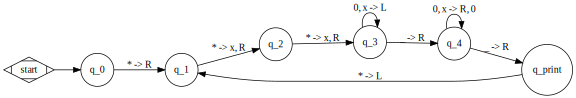

In [70]:
from graphviz import Digraph

f = Digraph('even length non-empty 0 filled word enumerator')
f.attr(rankdir='LR', size='8,5')

# draw the start state on the graph
f.attr('node', shape='Mdiamond')
f.node('start')
f.attr('node', shape='circle')
f.edge('start', 'q_0')

# 1. mark work tape start 
f.edge('q_0', 'q_1', label='* -> R')

# 2. write xx to the work tape
f.edge('q_1', 'q_2', label='* -> x, R')
f.edge('q_2', 'q_3', label='* -> x, R')

# 3. rewind work-tape-head to input start
f.edge('q_3', 'q_3', label='0, x -> L')
f.edge('q_3', 'q_4', label='_ -> R')

# 4. write 0s to the output tape
f.edge('q_4', 'q_4', label='0, x -> R, 0')
f.edge('q_4', 'q_print', label='_ -> R')

# 5. print and continue on to next cycle
f.edge('q_print', 'q_1', label='* -> L')

f